In [ ]:
# Import libraries
import pandas as pd
import numpy as np
from ucimlrepo import fetch_ucirepo
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score


abalone = fetch_ucirepo(id=1)
X = abalone.data.features
y = abalone.data.targets

# Flatten y if it's 2D
if isinstance(y, pd.DataFrame) or y.ndim == 2:
    y = y.values.ravel()  # converts (n,1) to (n,)

# One-hot encode the categorical 'Sex' column
X = pd.get_dummies(X, columns=['Sex'])


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

y_test_series = pd.Series(y_test, index=X_test.index)


model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)


mae = mean_absolute_error(y_test_series, y_pred)
r2 = r2_score(y_test_series, y_pred)

print("Model Performance:")
print("MAE:", round(mae, 3))
print("R²:", round(r2, 3))


errors = (y_test_series - y_pred).abs()
worst_idx = errors.nlargest(5).index

print("\n5 Worst Predictions:")
for idx in worst_idx:
    
    pred_value = y_pred[list(X_test.index).index(idx)]
    
    print(f"\nIndex: {idx}")
    print("Features:")
    print(X_test.loc[idx])
    print("Actual Rings:", y_test_series.loc[idx])
    print("Predicted Rings:", round(pred_value, 2))
    print("Absolute Error:", round(errors.loc[idx], 2))


Model Performance:
MAE: 1.585
R²: 0.53

5 Worst Predictions:

Index: 2334
Features:
Length              0.8
Diameter           0.63
Height            0.195
Whole_weight      2.526
Shucked_weight    0.933
Viscera_weight     0.59
Shell_weight       0.62
Sex_F              True
Sex_I             False
Sex_M             False
Name: 2334, dtype: object
Actual Rings: 23
Predicted Rings: 11.76
Absolute Error: 11.24

Index: 2335
Features:
Length              0.61
Diameter            0.49
Height              0.15
Whole_weight       1.103
Shucked_weight     0.425
Viscera_weight    0.2025
Shell_weight        0.36
Sex_F              False
Sex_I              False
Sex_M               True
Name: 2335, dtype: object
Actual Rings: 23
Predicted Rings: 11.79
Absolute Error: 11.21

Index: 433
Features:
Length             0.545
Diameter            0.42
Height              0.14
Whole_weight      0.7505
Shucked_weight    0.2475
Viscera_weight      0.13
Shell_weight       0.255
Sex_F              False
Sex_I

In [ ]:
#Compute absolute errors
errors = (y_test_series - y_pred).abs()
worst_idx = errors.nlargest(5).index
best_idx = errors.nsmallest(5).index


In [23]:
print("5 Worst Predictions:")
for idx in worst_idx:
    pred_value = y_pred[list(X_test.index).index(idx)]
    print(f"\nIndex: {idx}")
    print("Features:\n", X_test.loc[idx])
    print("Actual Rings:", y_test_series.loc[idx])
    print("Predicted Rings:", round(pred_value, 2))
    print("Absolute Error:", round(errors.loc[idx], 2))

print("\n5 Best Predictions:")
for idx in best_idx:
    pred_value = y_pred[list(X_test.index).index(idx)]
    print(f"\nIndex: {idx}")
    print("Features:\n", X_test.loc[idx])
    print("Actual Rings:", y_test_series.loc[idx])
    print("Predicted Rings:", round(pred_value, 2))
    print("Absolute Error:", round(errors.loc[idx], 2))


5 Worst Predictions:

Index: 2334
Features:
 Length              0.8
Diameter           0.63
Height            0.195
Whole_weight      2.526
Shucked_weight    0.933
Viscera_weight     0.59
Shell_weight       0.62
Sex_F              True
Sex_I             False
Sex_M             False
Name: 2334, dtype: object
Actual Rings: 23
Predicted Rings: 11.76
Absolute Error: 11.24

Index: 2335
Features:
 Length              0.61
Diameter            0.49
Height              0.15
Whole_weight       1.103
Shucked_weight     0.425
Viscera_weight    0.2025
Shell_weight        0.36
Sex_F              False
Sex_I              False
Sex_M               True
Name: 2335, dtype: object
Actual Rings: 23
Predicted Rings: 11.79
Absolute Error: 11.21

Index: 433
Features:
 Length             0.545
Diameter            0.42
Height              0.14
Whole_weight      0.7505
Shucked_weight    0.2475
Viscera_weight      0.13
Shell_weight       0.255
Sex_F              False
Sex_I              False
Sex_M            

In [ ]:
import pandas as pd

# Helper function to create a DataFrame for a set of predictions
def create_result_df(indices, label):
    rows = []
    for idx in indices:
        pred_value = y_pred[list(X_test.index).index(idx)]
        row = X_test.loc[idx].to_dict()  # all feature values
        row['Actual_Rings'] = y_test_series.loc[idx]
        row['Predicted_Rings'] = round(pred_value, 2)
        row['Absolute_Error'] = round(errors.loc[idx], 2)
        row['Type'] = label
        rows.append(row)
    return pd.DataFrame(rows)

# Create DataFrames for worst and best predictions
df_worst = create_result_df(worst_idx, 'Worst')
df_best = create_result_df(best_idx, 'Best')
df_results = pd.concat([df_best, df_worst], ignore_index=True)
df_results.to_excel("abalone_predictions_analysis.xlsx", index=False)
print("Results exported to 'abalone_predictions_analysis.xlsx'.")


Results exported to 'abalone_predictions_analysis.xlsx'.


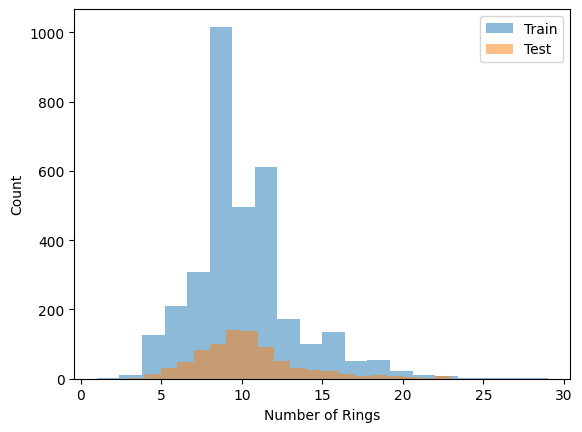

In [28]:
import matplotlib.pyplot as plt

plt.hist(y_train, bins=20, alpha=0.5, label='Train')
plt.hist(y_test, bins=20, alpha=0.5, label='Test')
plt.xlabel('Number of Rings')
plt.ylabel('Count')
plt.legend()
plt.show()
